In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\slain\AppData\Local\Temp\ipykernel_10180\1155928800.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df1 = pd.read_csv('XAU_USD_Historical_Data_2000_2010.csv', parse_dates=[0])
df2 = pd.read_csv('XAU_USD_Historical_Data_2010_2023.csv', parse_dates=[0])

In [3]:
dfs = [df2, df1]
gold_usd = pd.concat(dfs)

In [4]:
gold_usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [5]:
gold_usd.Date.min()

Timestamp('2000-01-03 00:00:00')

### The columns are:
Price: is the closing and it is the target.
Open: is the opening price (the price on the beggining of the day)
High: is the highest price during the day.
Low: is the lowest price during the day.
Vol.: indicates the amount of gold sold that day. it is not available for free so all of its values are NaN
Change %: is the percentage difference between the price today to the price the previous working day. 
    ( (price_today - price_prev) / price_prev )

In [6]:
gold_usd.Date.max()

Timestamp('2023-09-07 00:00:00')

In [7]:
gold_usd.index = gold_usd.Date

In [8]:
gold_usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2010-01-01,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
2010-01-04,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2010-01-05,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
2010-01-06,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
2010-01-07,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [9]:
gold_usd.drop('Date', inplace=True, axis=1)

In [10]:
gold_usd.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


#### changed the index to point to the date.

In [11]:
gold_usd.describe()

,Vol.
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


only the volume is showing on the describe which is not right. 

In [12]:
gold_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   object 
 1   Open      6168 non-null   object 
 2   High      6168 non-null   object 
 3   Low       6168 non-null   object 
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   object 
dtypes: float64(1), object(5)
memory usage: 337.3+ KB


The prices are not numbers?!

In [13]:
type(gold_usd.Price[0])

str

In [14]:
for col in ['Price', 'Open', 'High', 'Low']:
    gold_usd[col] = gold_usd[col].map(lambda row : float(row.replace(',', '')))

Prices have commas in them, remove the columns and cast to floats

In [15]:
gold_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   float64
 1   Open      6168 non-null   float64
 2   High      6168 non-null   float64
 3   Low       6168 non-null   float64
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   object 
dtypes: float64(5), object(1)
memory usage: 337.3+ KB


In [16]:
gold_usd['Change %'] = gold_usd['Change %'].map(lambda x: float(x.replace('%', '')))

Process `Change %` to become float too

In [17]:
gold_usd.drop('Vol.', inplace=True, axis=1)

In [18]:
gold_usd.head()

,Price,Open,High,Low,Change %
Date,,,,,
2010-01-01,1097.35,1097.25,1097.90,1097.05,0.10
2010-01-04,1120.40,1096.25,1123.80,1093.45,2.10
2010-01-05,1119.05,1121.30,1128.10,1115.25,-0.12
2010-01-06,1138.90,1118.40,1140.60,1116.00,1.77
2010-01-07,1132.30,1138.20,1139.15,1128.60,-0.58


In [19]:
gold_usd.index.is_monotonic_decreasing

False

In [20]:
gold_usd.index.is_monotonic_increasing

False

In [21]:
gold_usd = gold_usd.sort_index()

In [22]:
gold_usd.index.is_monotonic_increasing

True

In [23]:
def display_plot(data, title):
    data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="xx-large")
    plt.show()

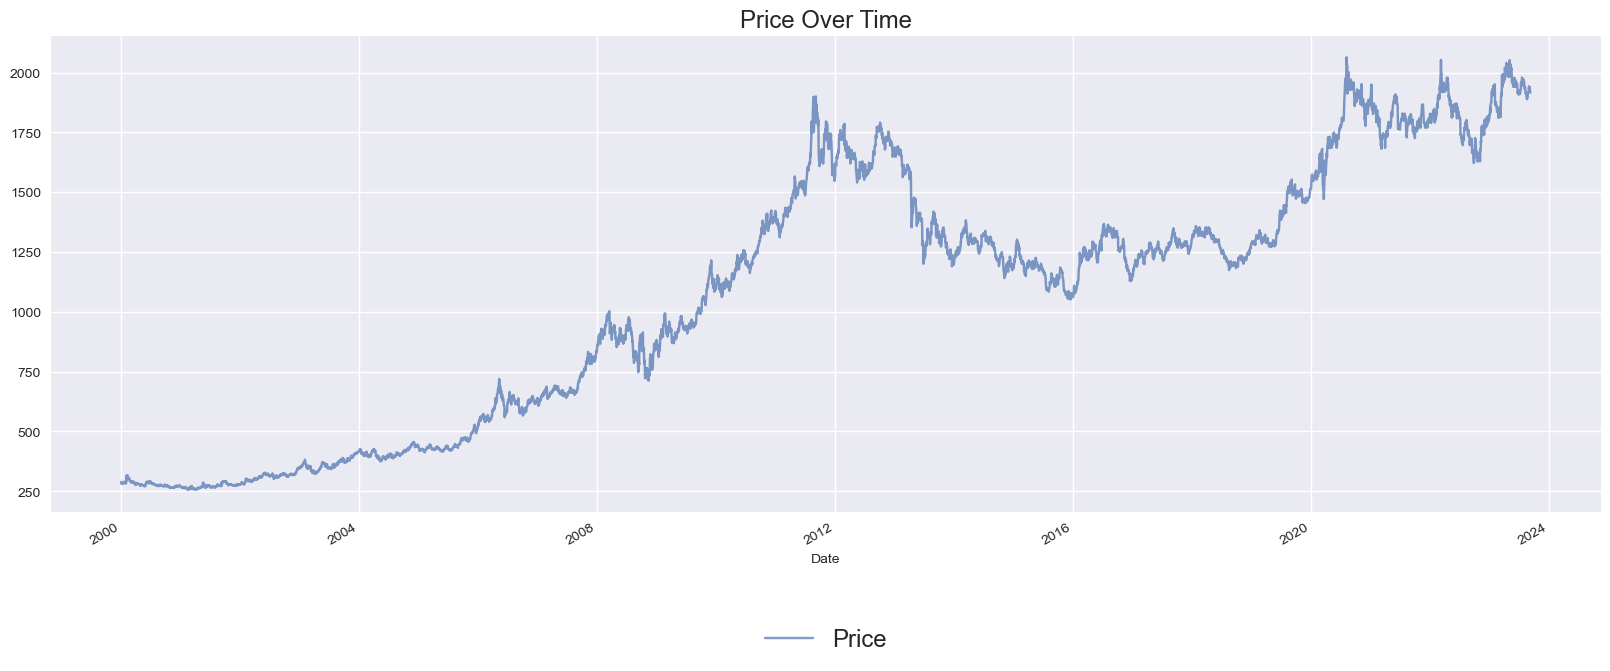

In [24]:
gold_price = gold_usd.Price
display_plot(gold_price, 'Closing Price Over Time')

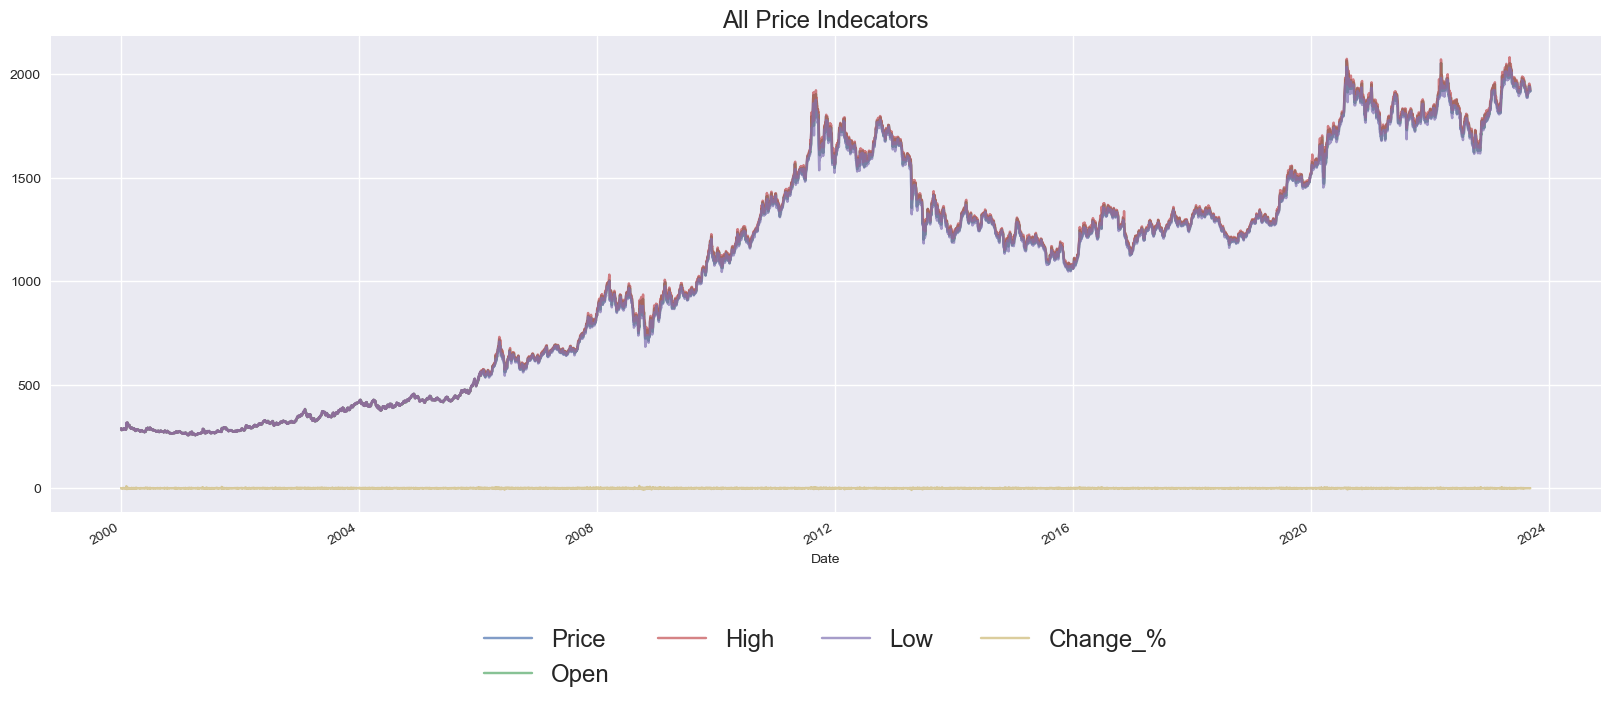

In [50]:
display_plot(gold_usd, 'All Price Indecators')

#### We can see that all price metrics are closly related.

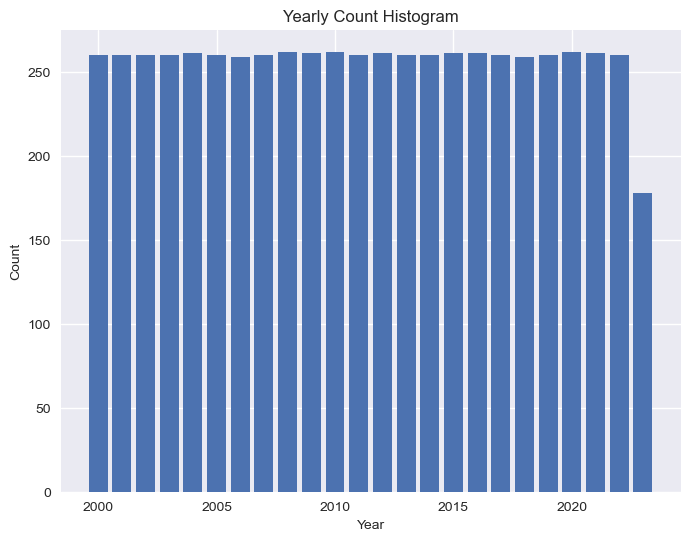

In [52]:
# Group by year and count occurrences
year_counts = gold_usd.index.year.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Count Histogram')
plt.show()

In [53]:
year_counts

2000    260
2001    260
2002    260
2003    260
2004    261
2005    260
2006    259
2007    260
2008    262
2009    261
2010    262
2011    260
2012    261
2013    260
2014    260
2015    261
2016    261
2017    260
2018    259
2019    260
2020    262
2021    261
2022    260
2023    178
Name: Date, dtype: int64

#### We can see that each year is missing about 100 years. which is approximately 2 days each week.

In [26]:
gold_usd['DayOfWeek'] = gold_usd.index.day_name()
gold_usd.head(10)

,Price,Open,High,Low,Change %,DayOfWeek
Date,,,,,,
2000-01-03,289.00,288.50,289.00,289.00,0.26,Monday
2000-01-04,282.45,288.75,282.45,282.45,-2.27,Tuesday
2000-01-05,281.00,281.50,281.00,281.00,-0.51,Wednesday
2000-01-06,281.23,280.12,281.23,281.23,0.08,Thursday
2000-01-07,281.75,281.15,281.75,281.75,0.18,Friday
2000-01-10,281.48,281.88,281.48,281.48,-0.10,Monday
2000-01-11,283.38,281.48,283.38,283.38,0.68,Tuesday
2000-01-12,282.48,283.27,282.48,282.48,-0.32,Wednesday
2000-01-13,284.25,282.60,284.25,284.25,0.63,Thursday


Adding the day of the week column because there might be days off.

In [54]:
gold_usd['DayOfWeek'].value_counts()

Wednesday    1235
Tuesday      1234
Thursday     1234
Monday       1233
Friday       1232
Name: DayOfWeek, dtype: int64

#### This indicates that Sunday and Saturday are days off.

In [27]:
gold_usd.shape

(6168, 6)

In [28]:
gold_usd.rename(columns={'Change %': 'Change_%'}, inplace=True)

In [29]:
gold_usd.to_csv('all_data.csv')

saving preprocessed data as it may be needed later

In [30]:
test_date = '2023-06-01'
train_data, test_data = gold_usd[gold_usd.index < test_date], gold_usd[gold_usd.index >= test_date]
train_data.tail()

,Price,Open,High,Low,Change_%,DayOfWeek
Date,,,,,,
2023-05-25,1940.34,1958.13,1964.95,1938.86,-0.85,Thursday
2023-05-26,1946.33,1940.69,1957.40,1936.84,0.31,Friday
2023-05-29,1942.84,1944.09,1949.75,1940.30,-0.18,Monday
2023-05-30,1959.14,1944.19,1963.63,1932.08,0.84,Tuesday
2023-05-31,1962.30,1959.30,1975.34,1953.67,0.16,Wednesday


In [31]:
test_data.shape

(71, 6)

The last 2 months are preserved for testing

In [32]:
train_data

,Price,Open,High,Low,Change_%,DayOfWeek
Date,,,,,,
2000-01-03,289.00,288.50,289.00,289.00,0.26,Monday
2000-01-04,282.45,288.75,282.45,282.45,-2.27,Tuesday
2000-01-05,281.00,281.50,281.00,281.00,-0.51,Wednesday
2000-01-06,281.23,280.12,281.23,281.23,0.08,Thursday
2000-01-07,281.75,281.15,281.75,281.75,0.18,Friday
...,...,...,...,...,...,...
2023-05-25,1940.34,1958.13,1964.95,1938.86,-0.85,Thursday
2023-05-26,1946.33,1940.69,1957.40,1936.84,0.31,Friday
2023-05-29,1942.84,1944.09,1949.75,1940.30,-0.18,Monday


In [55]:
from statsmodels.tsa.stattools import adfuller


def check_stationarity(series, name):
    
    result = adfuller(series.values)
    print(f'\n    Augmented Dickey-Fuller Test on {name}', "\n   ", '-'*40)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32m    Stationary\u001b[0m")
    else:
        print("\x1b[31m    Non-stationary\x1b[0m")
    print('    ','-'*40)

In [38]:
check_stationarity(train_data['Price'], 'Price')


    Augmented Dickey-Fuller Test on Price 
    ----------------------------------------
ADF Statistic: -0.695518
p-value: 0.847907
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
    Non-stationary
     ----------------------------------------


even though the graph by itself shows that the data is non-stationary. here is a calculation way to do it.

In [33]:
train_diff = train_data[['Price', 'Open', 'High', 'Low', 'Change_%']].diff().dropna()

In [34]:
train_diff.head()

,Price,Open,High,Low,Change_%
Date,,,,,
2000-01-04,-6.55,0.25,-6.55,-6.55,-2.53
2000-01-05,-1.45,-7.25,-1.45,-1.45,1.76
2000-01-06,0.23,-1.38,0.23,0.23,0.59
2000-01-07,0.52,1.03,0.52,0.52,0.10
2000-01-10,-0.27,0.73,-0.27,-0.27,-0.28


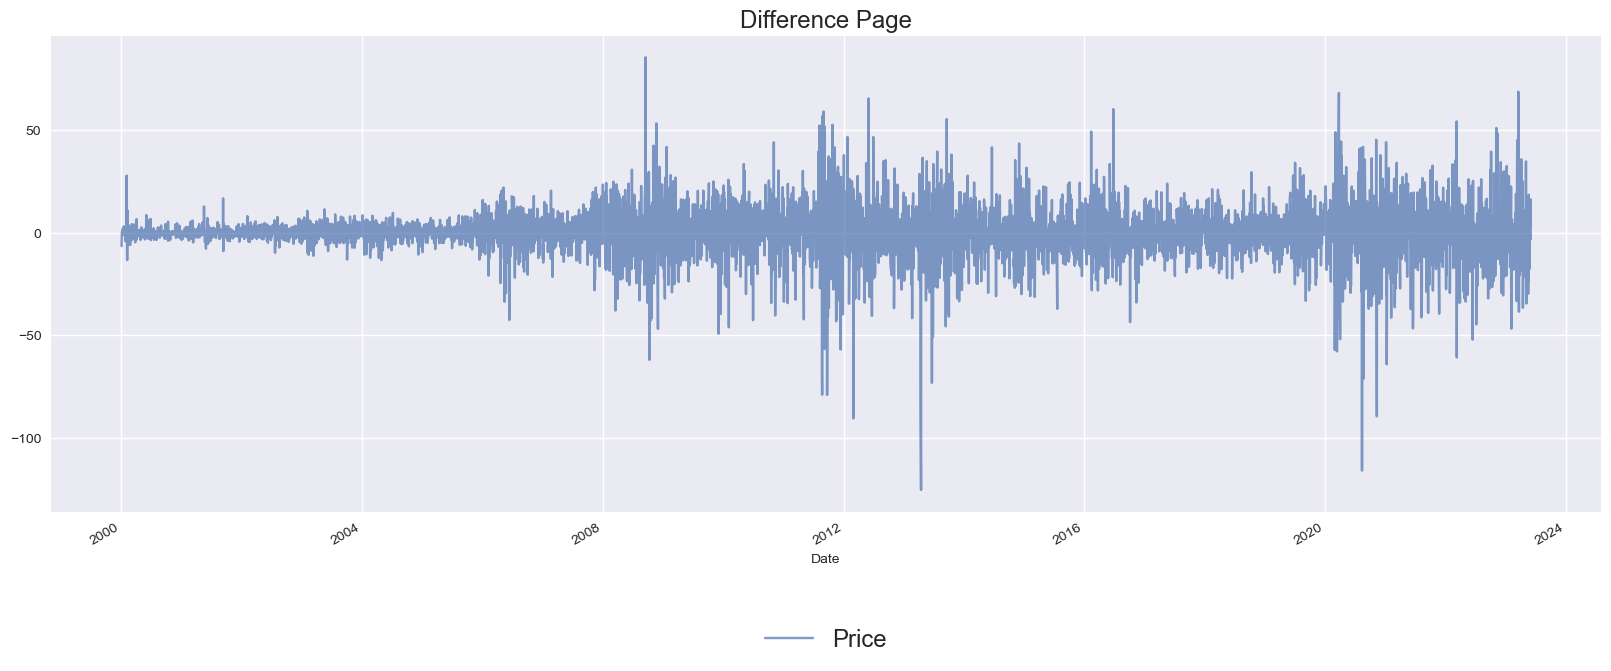

In [35]:
display_plot(train_diff['Price'], 'Difference Page')

In [37]:
check_stationarity(train_diff['Price'], 'Price')


    Augmented Dickey-Fuller Test on Price 
    ----------------------------------------
ADF Statistic: -56.170026
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
    Stationary
     ----------------------------------------


The data is stationary after one differencing. this means that the trend is linear. Auto Regrissor should work nicely.

In [68]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import random
random.seed(42)

train = train_data['Price']
test = test_data['Price']

validation_length = len(test)

# val_date = '2023-02-01'
# train, val = train[train.index < val_date], train[train.index >= val_date]

import itertools

# Define parameter combinations to try
p_values = range(0, 5)
d_values = range(1, 2)
q_values = range(0, 5)

best_rmse = float('inf')
best_params = None
best_model = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()

        # Make predictions
        validation_start = random.randint(0, len(train) - validation_length - 1)
        validation_end = validation_start+validation_length
        predictions = model_fit.predict(start=validation_start, end=validation_end, dynamic=True)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(train[validation_start:validation_end+1], predictions))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)
            best_model = model_fit

    except Exception as e:
        print(e)
        continue

print("Best RMSE:", best_rmse)
print("Best Parameters (p, d, q):", best_params)

Best RMSE: 4.3716581078857955
Best Parameters (p, d, q): (4, 1, 0)


* This is clearly overfit but let's invistigate further how the behavior looks
* also q is 0. 
* q = zero indicates that this mode doesn't account for residuals.

In [70]:
test_predictions = best_model.forecast(len(test))
rmse = np.sqrt(mean_squared_error(test, test_predictions))

In [71]:
print(rmse)

35.55648948463555


In [72]:
df1 = pd.DataFrame(test)
test_predictions.index = test.index
df1['Predicted'] = test_predictions
df1.index = test.index
df1.head()

,Price,Predicted
Date,,
2023-06-01,1977.88,1961.947012
2023-06-02,1947.63,1961.875815
2023-06-05,1961.45,1961.836607
2023-06-06,1962.85,1961.828990
2023-06-07,1939.63,1961.830807


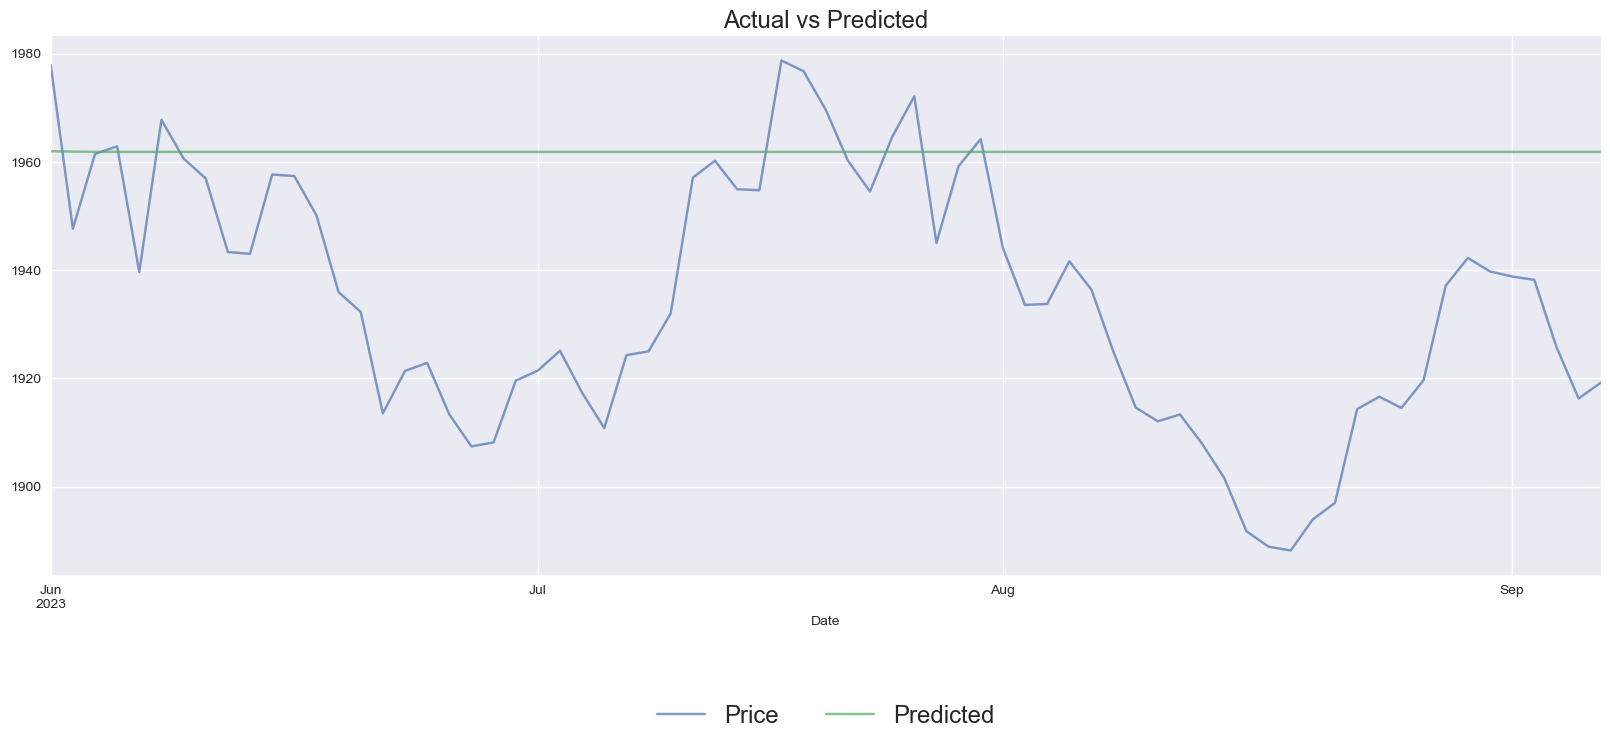

In [73]:
display_plot(df1, 'Actual vs Predicted')

This model says: the best prediction for `tomorrow's price` is `yesterday's price`

#### Last note: we haven't considered data expiration yet

In [ ]:
test_predictions = model_fit.forecast(len(test))
rmse = np.sqrt(mean_squared_error(test, test_predictions))

In [ ]:
df2 = pd.DataFrame(test)
test_predictions.index = test.index
df2['Predicted'] = test_predictions
df2.index = test.index
df2.head()

In [ ]:
display_plot(df2, 'Actual vs Predicted')